# 1、将格式转变为instruction和output

In [1]:
import json

def rename_fields(input_file, output_file):
    """
    将JSON文件中的字段`question`重命名为`instruction`，`answer`重命名为`output`，并将结果保存到一个新文件中。

    Args:
        input_file (str): 输入JSON文件的路径。
        output_file (str): 输出JSON文件的路径。
    """
    try:
        with open(input_file, 'r', encoding='utf-8') as f_in:
            data = json.load(f_in)

        # 遍历每个条目并重命名字段
        for entry in data:
            if 'question' in entry:
                entry['instruction'] = entry.pop('question')
            if 'answer' in entry:
                entry['output'] = entry.pop('answer')

        # 将修改后的数据保存到输出文件
        with open(output_file, 'w', encoding='utf-8') as f_out:
            json.dump(data, f_out, indent=4, ensure_ascii=False)

        print(f"Successfully renamed fields and saved to '{output_file}'.")

    except FileNotFoundError:
        print(f"Error: Input file '{input_file}' not found.")
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in '{input_file}'.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


input_file = '/remote-home/xiaoyili/2025-Medical/Reflection_Tuning/data/huatuo_26m_lite/huatuo_26m_lite_score_5.json'  # 替换为你的输入JSON文件路径
output_file = '/remote-home/xiaoyili/2025-Medical/Reflection_Tuning/data/huatuo_26m_lite/huatuo_26m_lite_score_5_alpaca.json'  # 替换为你的输出JSON文件路径

rename_fields(input_file, output_file)

Successfully renamed fields and saved to '/remote-home/xiaoyili/2025-Medical/Reflection_Tuning/data/huatuo_26m_lite/huatuo_26m_lite_score_5._alpaca.json'.


# 2、提取指定条数

In [3]:
import json

def extract_and_save(input_file, output_file, num_to_extract):
    """
    从 JSON 文件中提取指定数量的条目，并将它们保存到另一个 JSON 文件。

    Args:
        input_file (str): 输入 JSON 文件的路径。
        output_file (str): 输出 JSON 文件的路径。
        num_to_extract (int): 要提取的条目数量。
    """

    try:
        with open(input_file, 'r', encoding='utf-8') as f_in:
            data = json.load(f_in)

        # 确保数据是一个列表
        if not isinstance(data, list):
            print(f"Error: Input file '{input_file}' does not contain a JSON list.")
            return

        # 提取指定数量的条目
        extracted_data = data[:num_to_extract]

        # 保存提取的数据到输出文件
        with open(output_file, 'w', encoding='utf-8') as f_out:
            json.dump(extracted_data, f_out, indent=4, ensure_ascii=False)  # 使用 indent=4 格式化输出，ensure_ascii=False 支持中文

        print(f"Successfully extracted {num_to_extract} entries from '{input_file}' and saved them to '{output_file}'.")

    except FileNotFoundError:
        print(f"Error: Input file '{input_file}' not found.")
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in '{input_file}'.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

num_to_extract = 100  # 替换为你想要提取的条目数量
input_file = '/remote-home/xiaoyili/2025-Medical/Reflection_Tuning/data/huatuo_26m_lite/huatuo_26m_lite_score_5_alpaca.json'  # 替换为你的输入 JSON 文件名
output_file = '/remote-home/xiaoyili/2025-Medical/Reflection_Tuning/data/huatuo_26m_lite/huatuo_26m_lite_score_5_alpaca_{}.json'.format(num_to_extract)  # 替换为你的输出 JSON 文件名

extract_and_save(input_file, output_file, num_to_extract)

Successfully extracted 100 entries from '/remote-home/xiaoyili/2025-Medical/Reflection_Tuning/data/huatuo_26m_lite/huatuo_26m_lite_score_5_alpaca.json' and saved them to '/remote-home/xiaoyili/2025-Medical/Reflection_Tuning/data/huatuo_26m_lite/huatuo_26m_lite_score_5_alpaca_100.json'.


# 3、结果分析

## 3-1 rifd和ifd的整体情况

[{'id': 22647835, 'score': 5, 'label': '眼耳鼻喉科', 'related_diseases': '鼻中隔偏曲', 'instruction': '上个月感冒了，也没有用药，感冒好了以后就觉得鼻子经常不通畅，鼻子还经常晦气红皮、发痒、而且还会有头晕，一直都以为是上次感冒留下的后遗症，去医院检查，检查结果出来以后说是鼻中隔偏曲。请问如何治疗鼻中隔偏曲？', 'output': '治疗鼻中隔偏曲的方法有手术和非手术治疗两种，手术治疗是通过手术矫正鼻中隔偏曲，非手术治疗则是通过药物治疗和物理治疗来缓解症状。手术治疗是治疗鼻中隔偏曲的最有效方法，手术后需要注意休息，避免剧烈运动和低头工作，同时也要注意饮食，少吃辛辣食物和不喝酒。手术后两周内鼻涕或痰中出现血水或血块是正常现象，若出现大量出血、发烧、剧烈疼痛时请尽速就医。', 'ppl_Q_direct': 18.845476150512695, 'ppl_A_direct': 7.004806041717529, 'ppl_Q_condition': 20.971277236938477, 'ppl_A_condition': 5.561257362365723, 'ifd_ppl': 0.7939202497892635, 'rifd_ppl': 1.1128016649432309, 'loss_Q_direct': 2.9362728595733643, 'loss_A_direct': 1.9465965032577515, 'loss_Q_condition': 3.043153762817383, 'loss_A_condition': 1.7158242464065552, 'ifd_loss': 0.8814483348423855, 'rifd_loss': 1.0364001945171908}, {'id': 6122835, 'score': 5, 'label': '眼耳鼻喉科', 'related_diseases': '扁桃体炎', 'instruction': '嗓子干疼，尤其是吞咽拭感觉疼得厉害，是什么原因，去医院检查说是典型的扁桃体炎，但吃药后疼痛没有减轻，想问问到底是什么病，应该怎么治疗？', 'output': '根据症状描述，可能是扁桃体炎引起的

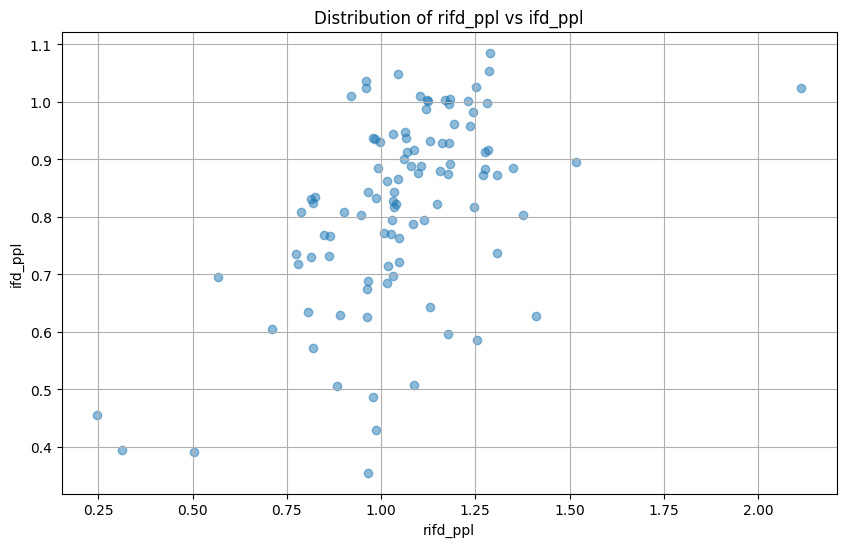

In [4]:
import json
import matplotlib.pyplot as plt

json_file_path = '/remote-home/xiaoyili/2025-Medical/Reflection_Tuning/data/huatuo_26m_lite/result/huatuo_26m_lite_score_5_alpaca_100.json'

# 读取 JSON 文件
with open(json_file_path, 'r') as file:
    data = json.load(file)
print(data)
# 提取 rifd_ppl 和 ifd_ppl 数据
rifd_ppl_values = [item['rifd_ppl'] for item in data]
ifd_ppl_values = [item['ifd_ppl'] for item in data]

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(rifd_ppl_values, ifd_ppl_values, alpha=0.5)
plt.title('Distribution of rifd_ppl vs ifd_ppl')
plt.xlabel('rifd_ppl')
plt.ylabel('ifd_ppl')
plt.grid(True)
plt.show()

## 3-2 case study

In [9]:
import json
import csv

# 假设 JSON 文件路径为 'huatuo_26m_lite_score_5_alpaca_100.json'
json_file_path = '/remote-home/xiaoyili/2025-Medical/Reflection_Tuning/data/huatuo_26m_lite/result/huatuo_26m_lite_score_5_alpaca_100.json'

# 读取 JSON 文件
with open(json_file_path, 'r') as file:
    data = json.load(file)

# 按 rifd_ppl 降序排列
sorted_by_rifd_ppl = sorted(data, key=lambda x: x.get('rifd_ppl', 0), reverse=True)

# 按 ifd_ppl 降序排列
sorted_by_ifd_ppl = sorted(data, key=lambda x: x.get('ifd_ppl', 0), reverse=True)

# 保存按 rifd_ppl 降序排列的数据到 CSV 文件
csv_file_path_rifd = 'result/sorted_by_rifd_ppl.csv'
with open(csv_file_path_rifd, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['rifd_ppl', 'ifd_ppl', 'instruction', 'output']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for item in sorted_by_rifd_ppl:
        writer.writerow({
            'rifd_ppl': item.get('rifd_ppl', 'N/A'),
            'ifd_ppl': item.get('ifd_ppl', 'N/A'),
            'instruction': item.get('instruction', 'N/A'),
            'output': item.get('output', 'N/A')
        })

# 保存按 ifd_ppl 降序排列的数据到 CSV 文件
csv_file_path_ifd = 'result/sorted_by_ifd_ppl.csv'
with open(csv_file_path_ifd, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['rifd_ppl', 'ifd_ppl', 'instruction', 'output']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for item in sorted_by_ifd_ppl:
        writer.writerow({
            'rifd_ppl': item.get('rifd_ppl', 'N/A'),
            'ifd_ppl': item.get('ifd_ppl', 'N/A'),
            'instruction': item.get('instruction', 'N/A'),
            'output': item.get('output', 'N/A')
        })

print(f"数据已保存到 {csv_file_path_rifd} 和 {csv_file_path_ifd}")

数据已保存到 result/sorted_by_rifd_ppl.csv 和 result/sorted_by_ifd_ppl.csv
